In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import math
import copy
%matplotlib inline


In [2]:
df = fetch_california_housing()

In [3]:
data = pd.DataFrame(data=df.data, columns=df['feature_names'])

In [4]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [7]:
data.shape

(20640, 8)

In [8]:
X = np.c_[np.ones(data.shape[0]), data]
len(X)

20640

# Gradient Descent

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
X = data
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
m = X_train.shape[0]
w = np.zeros(X_train.shape[1])
b = 0.0 

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        total_cost += (f_wb - y[i]) ** 2
    total_cost = total_cost / (2 * m)
    return total_cost

In [17]:
cost = compute_cost(X_train,y_train, w, b)
print(cost)

2.8107242683440585


In [18]:
def compute_gradient(x, y, w, b):
#     df_dw = (1/m) * ∑i=1 [(hθ(xi) − yi) * x(i)]
#    df_db  = (1/m) * ∑i=1 [(hθ(xi) − yi)]

    m, n = x.shape
    df_dw = np.zeros(n)
    df_db = 0
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        err = f_wb - y[i]
        df_dw += err * x[i]
        df_db += err
    
    df_dw /= m
    df_db /= m
    
    return df_dw, df_db

In [19]:
df_dw, df_db = compute_gradient(X_train, y_train, w, b)
print(f"Derivative of df_dw: {df_dw}")
print(f"Derivative of df_db: {df_db}")

Derivative of df_dw: [-0.7965923  -0.12332569 -0.17605601  0.05608474  0.02814481  0.02425994
  0.16381241  0.057117  ]
Derivative of df_db: -2.0692396089423872


In [20]:
def gradient_descent(x, y, w, b, compute_cost, gradient_function, alpha, num_iters): 
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration
    J_history = []
    w_history = []
    w = copy.deepcopy(w) 
    b = b
    
    for i in range(num_iters):

        # Calculate the gradient 
        dj_dw, dj_db = gradient_function(x, y, w, b)  

        # Update Parameters using w, b, alpha and gradient
        w -= alpha * dj_dw               
        b -= alpha * dj_db  
        
        
       # Save cost J at each iteration
        if i<100000:      
            J_history.append( compute_cost(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [21]:
# initialize fitting parameters. 
initial_w = np.zeros_like(w)
initial_b = 0.


iterations = 1000
alpha = 0.01

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost,
                                            compute_gradient, alpha, iterations)

print(f"b,w found by gradient descent: {b_final},{w_final} ")


Iteration    0: Cost     2.76   
Iteration  100: Cost     0.65   
Iteration  200: Cost     0.36   
Iteration  300: Cost     0.31   
Iteration  400: Cost     0.30   
Iteration  500: Cost     0.29   
Iteration  600: Cost     0.29   
Iteration  700: Cost     0.29   
Iteration  800: Cost     0.28   
Iteration  900: Cost     0.28   
b,w found by gradient descent: 2.069150277287305,[ 0.82332821  0.17862669 -0.13522355  0.15797675  0.01908925 -0.04624692
 -0.48847958 -0.45451616] 


In [22]:
w_final

array([ 0.82332821,  0.17862669, -0.13522355,  0.15797675,  0.01908925,
       -0.04624692, -0.48847958, -0.45451616])

In [24]:
m = X_train.shape[0]  # Get the number of training examples
for i in range(m):
    # Calculate the prediction for each example
    y_pred1 = np.dot(X_train[i], w_final) + b_final
    
    # Print the prediction and the actual target value
    print(f"Prediction: {y_pred1:0.2f}, Target Value: {y_train[i]}")

Prediction: 2.24, Target Value: 1.938
Prediction: 1.64, Target Value: 1.697
Prediction: 2.46, Target Value: 2.598
Prediction: 0.99, Target Value: 1.361
Prediction: 2.35, Target Value: 5.00001
Prediction: 2.00, Target Value: 2.813
Prediction: 1.75, Target Value: 2.161
Prediction: 1.77, Target Value: 1.174
Prediction: 2.69, Target Value: 5.00001
Prediction: 1.50, Target Value: 1.042
Prediction: 1.97, Target Value: 1.281
Prediction: 0.83, Target Value: 0.647
Prediction: 1.35, Target Value: 0.735
Prediction: 1.90, Target Value: 1.702
Prediction: 2.74, Target Value: 2.412
Prediction: 1.28, Target Value: 0.815
Prediction: 1.93, Target Value: 0.974
Prediction: 2.74, Target Value: 2.3
Prediction: 2.11, Target Value: 1.563
Prediction: 2.69, Target Value: 3.352
Prediction: 3.02, Target Value: 3.246
Prediction: 2.58, Target Value: 1.758
Prediction: 1.77, Target Value: 1.373
Prediction: 1.96, Target Value: 1.214
Prediction: 1.37, Target Value: 2.427
Prediction: 1.07, Target Value: 0.662
Prediction

In [30]:
# Calculate Mean Squared Error on the test set
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 4.828781996381486


# Visualization of Cost Function over iteration using Plotly

In [105]:
import plotly.graph_objects as go
# Plot the cost function over iterations
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=np.arange(len(J_hist[10:])),
    y=J_hist,
    mode='lines',
    name='Cost Function'
))

fig.update_layout(
    title='Loss Function Over Iterations',
    xaxis_title='Iteration',
    yaxis_title='Cost',
    template='plotly_dark'
)
fig.show()

#  Linear Regression using scikit-learn library

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lm = LinearRegression()

In [82]:
lm.fit(X_train, y_train)

LinearRegression()

In [83]:
from sklearn.metrics import r2_score, mean_squared_error

In [84]:
lm.score(X_test, y_test)

0.5957702326061664

# Cross Validation

In [85]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [86]:
mse = cross_val_score(lm, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

In [87]:
mse

array([-0.56799593, -0.52918854, -0.48456478, -0.51627013, -0.54833859,
       -0.47884524, -0.47828648, -0.55465187, -0.55647389, -0.54248888])

In [89]:
print("The mean of the folds are", mse.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -0.5257104326777 and the standard deviation is 0.006929210596513938


In [76]:
cross_val = cross_val_score(lm, X_train, y_train, cv=2)
cross_val.mean()

0.6080329664914255

In [96]:
yhat = cross_val_predict(lm, X_train, y_train, cv=10)
yhat

array([2.13595434, 1.76883072, 2.75370819, ..., 2.03598107, 2.8394537 ,
       2.27546169])

In [97]:
pred = lm.predict(X_test)
pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

In [107]:
mse = (pred - y_test)**2
np.mean(mse)

0.5305677824766752

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19440\1027265619.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




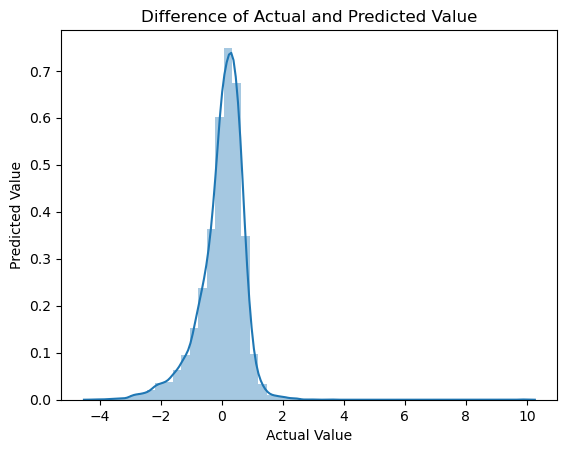

In [108]:
sns.distplot(x=pred-y_test, kde=True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Difference of Actual and Predicted Value')
plt.show()